# Beijing Air-Quality Time Series Project
### Exploratory Data Analysis Notebook

by Dolci Sanders and Paul Torres



In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import prettyplotlib as ppl
from prettyplotlib import brewer2mpl
from pylab import savefig 

import glob
from sklearn.model_selection import train_test_split
import pickle

# Styling Guide 

plt.style.use('fivethirtyeight')
sns.set_palette(sns.diverging_palette(250,700, s= 70 , l= 10, n= 12))


## Read in Data from Cleaning Set

In [2]:
train = pd.read_pickle('PKL/train.pkl')
test = pd.read_pickle('PKL/test.pkl')
time = pd.read_pickle('PKL/time.pkl')

In [3]:
# Set date in time full data frame additional to index 

time['Date'] = pd.to_datetime(time[['year','month','day','hour']])

Visualization PM2.5 break up based on station 
Districts with better air quality
Do any of them reach an acceptable standard? 
Trends? Worse or better
Differences in better worse? City Center? 
Suburbs better? 

### Key of Features

PM2.5 - Target - Particulate Matter 2.5 micrometers and smaller

PM10 - Secondary Target - Particulate Matter 10 micrometers and smaller

SO2 - Sulfer Dioxide

NO2 - Nitrogen Dioxide

CO - Carbon Monoxide

O3 - Ozone 

TEMP - Temperature

PRESSURE - Air pressure

DEWP - Dew Point

RAIN - Amount of Rain in mm

wd - Wind Direction (Also our only catergorical data)

WDSPM - Wind Speed 

station - Station where measurements came from 

station_latitude - Latitude of Station

station_longitude - Longitude of Station

## Station

Our data came from 12 reporting stations. Here our data is visualized to see what stations are reporting higher levels of PM2.5 

Huairou, Changping, and Dingling have the three lowest reportings. 
Wan Shou Xin Gong, Dongsi, and Gucheng/Nongzhanguan have the four highest reportings.


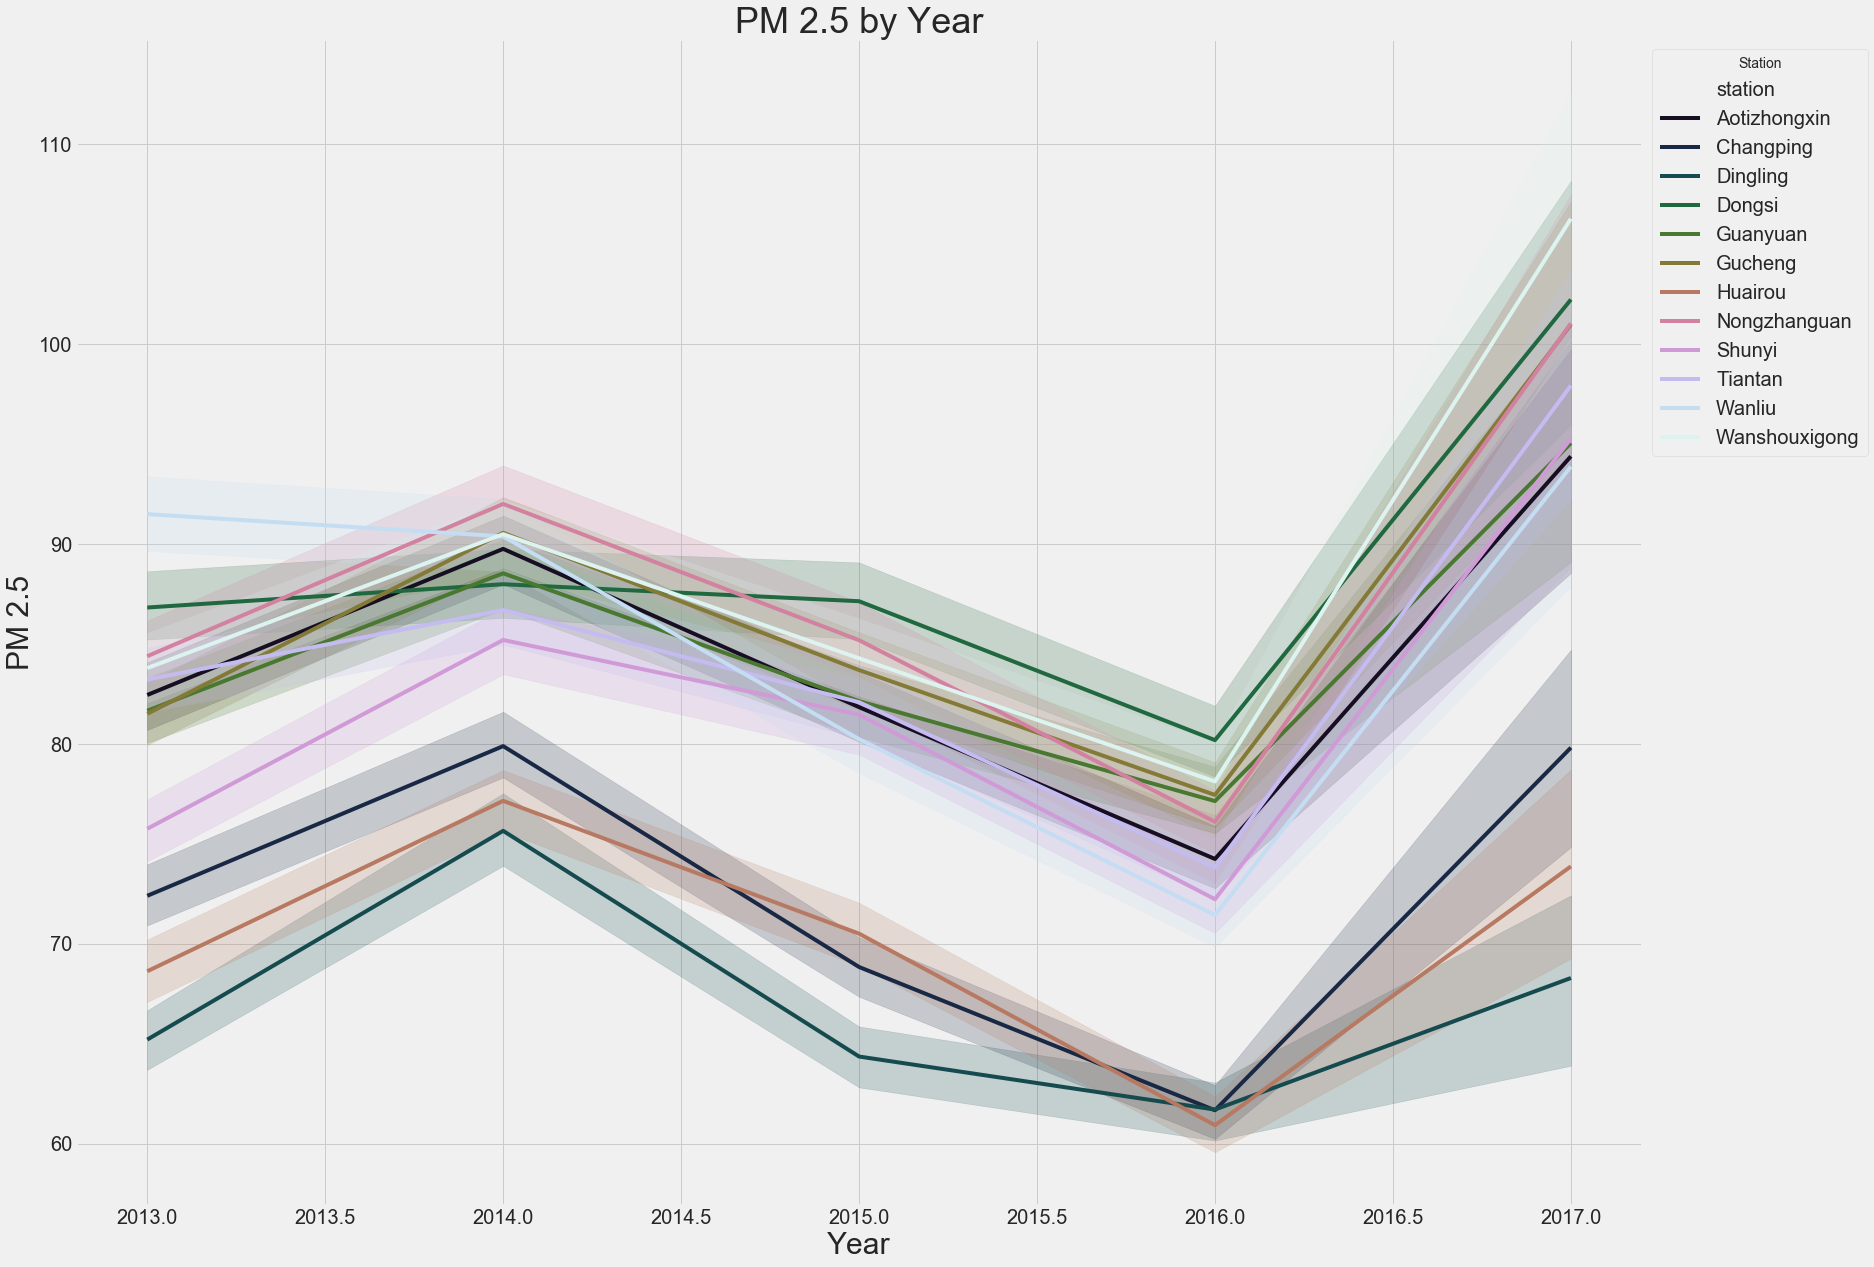

In [59]:
fig = plt.figure(figsize = (25,20))
sns.set_palette(sns.color_palette("cubehelix", n_colors=12))
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time, hue = 'station', dashes = False, markers = ["o", "<", ">", "^"])
 
plt.title("PM 2.5 by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend(title='Station', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 20)
plt.show()

fig.savefig('PNG/PM25_year_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True)

In [25]:
time_Huairou = time[time.station == 'Huairou']
time_Changping = time[time.station == 'Changping']
time_Dingling = time[time.station == 'Dingling']
time_Wanshouxigong = time[time.station == 'Wanshouxigong']
time_Dongsi = time[time.station == 'Dongsi'] 
time_Gucheng = time[time.station == 'Gucheng']
time_Nongzhanguan = time[time.station == 'Nogzhanguan']

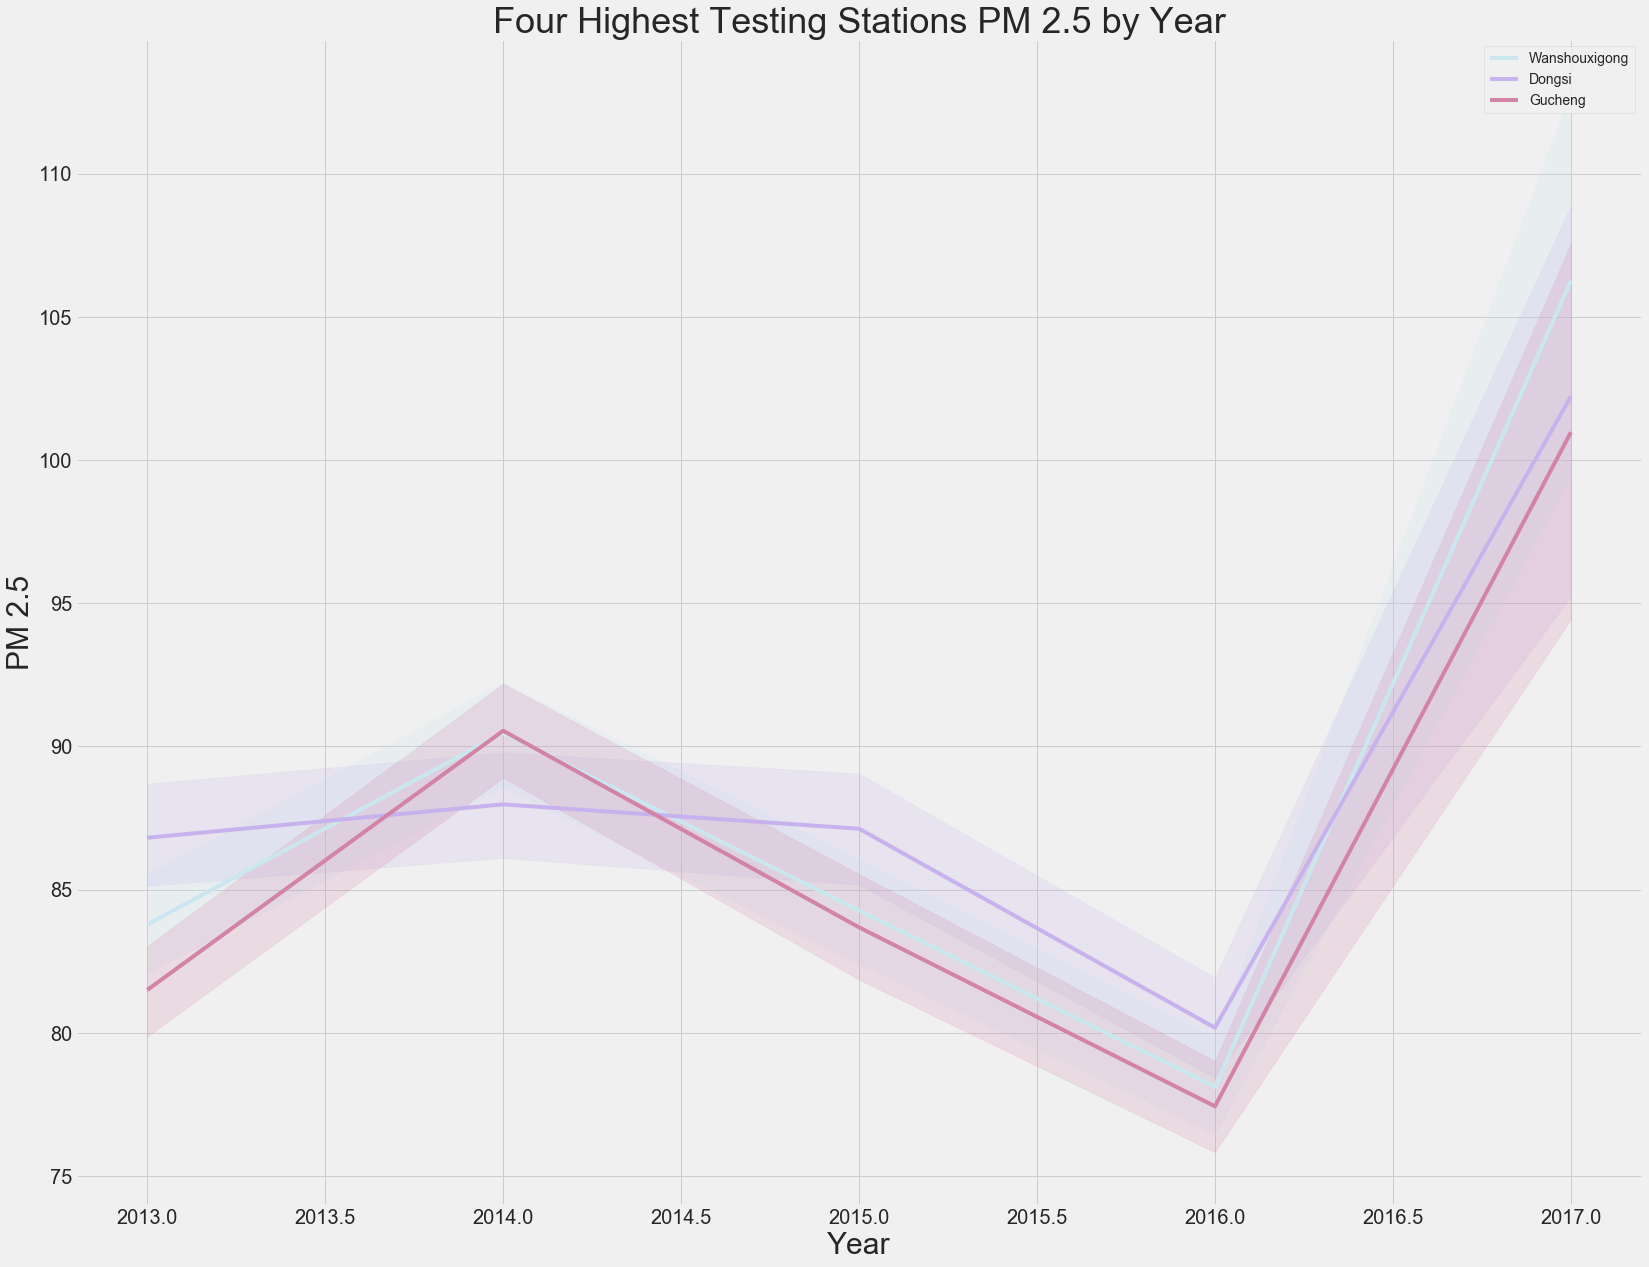

In [104]:
sns.set_palette(sns.color_palette("cubehelix_r", n_colors=7))
fig = plt.figure(figsize = (25,20))

sns.lineplot(x = "year", y = "PM2.5", data = time_Wanshouxigong, dashes = False, markers = ["o", "<", ">", "^"], label = 'Wanshouxigong')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dongsi, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dongsi')
sns.lineplot(x = "year", y = "PM2.5", data = time_Gucheng, dashes = False, markers = ["o", "<", ">", "^"], label = 'Gucheng')
sns.lineplot(x = "year", y = "PM2.5", data = time_Nongzhanguan, dashes = False, markers = ["o", "<", ">", "^"], label = 'Nongzhanguan')


plt.title("Four Highest Testing Stations PM 2.5 by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_high_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

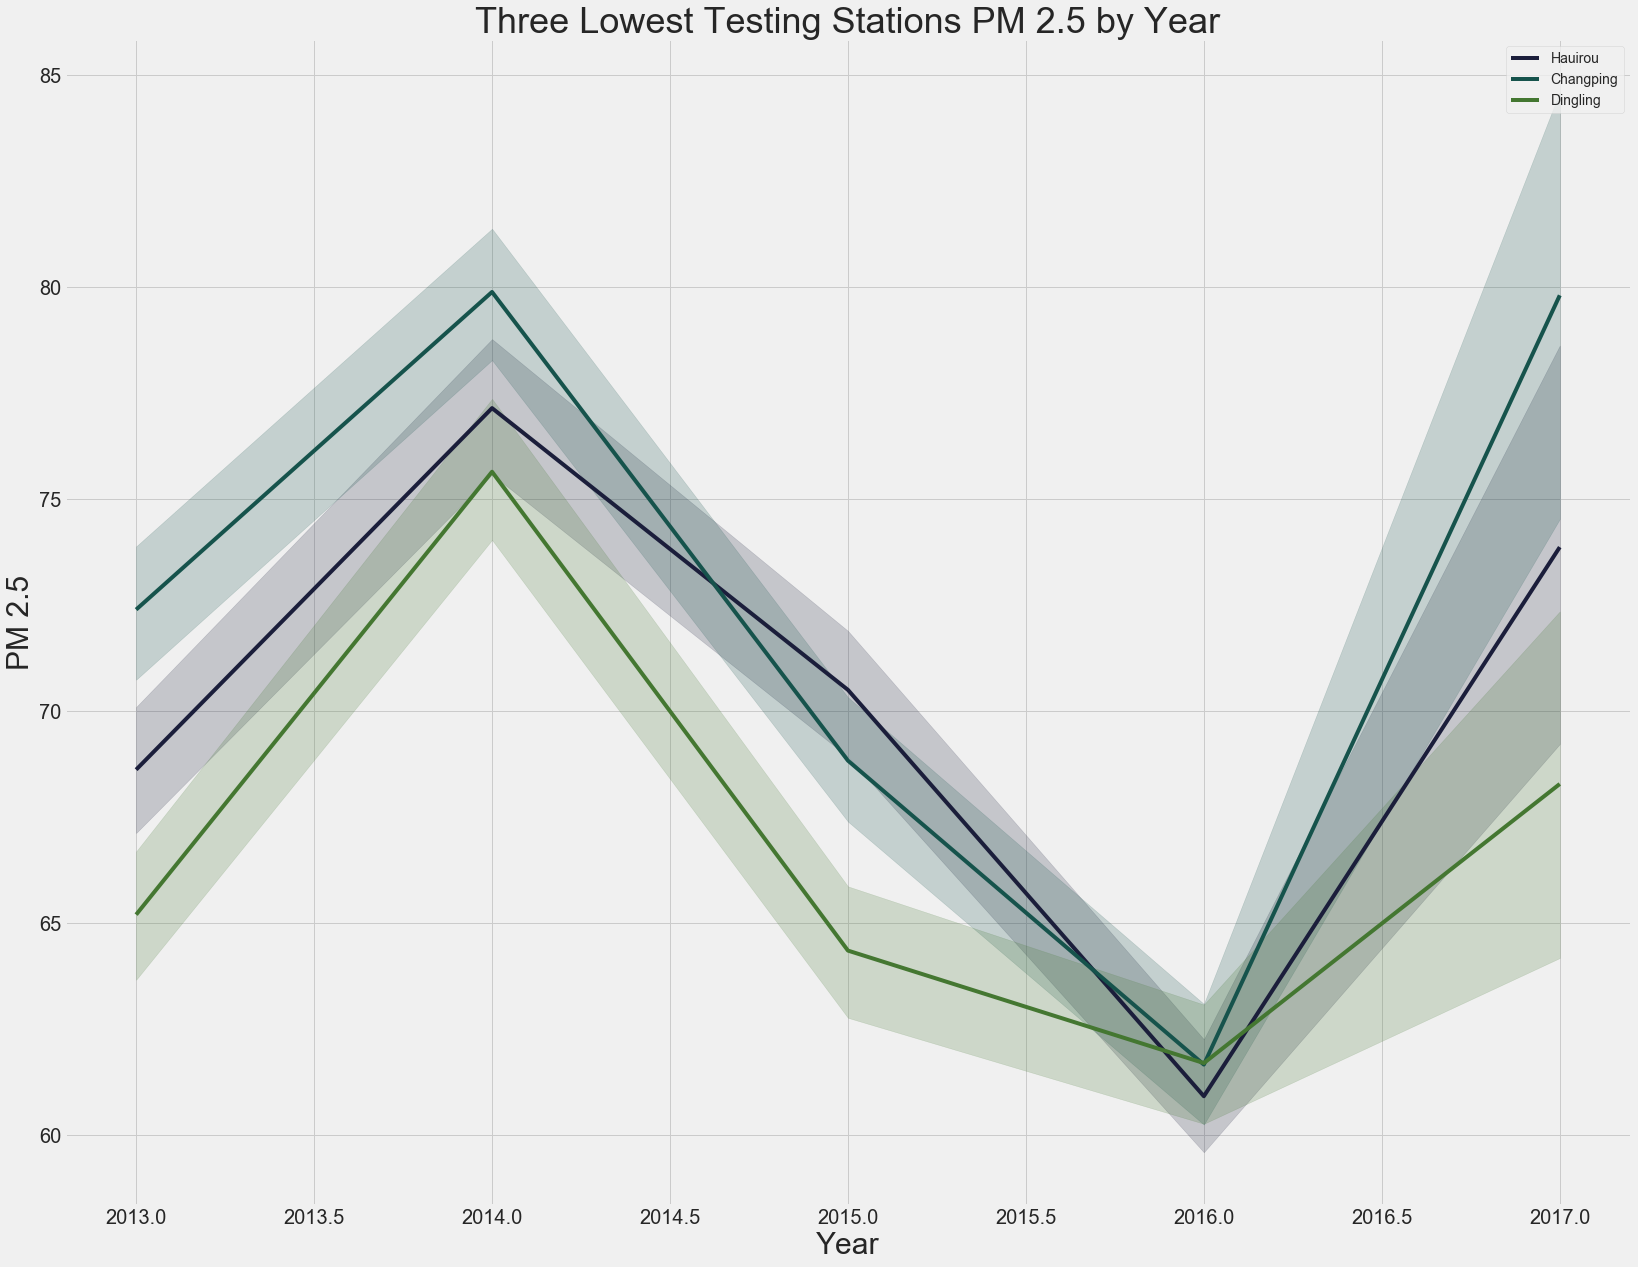

In [103]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (25,20))

# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "year", y = "PM2.5", data = time_Huairou, dashes = False, markers = ["o", "<", ">", "^"], label = 'Hauirou')
sns.lineplot(x = "year", y = "PM2.5", data = time_Changping, dashes = False, markers = ["o", "<", ">", "^"], label = 'Changping')
sns.lineplot(x = "year", y = "PM2.5", data = time_Dingling, dashes = False, markers = ["o", "<", ">", "^"], label = 'Dingling')



plt.title("Three Lowest Testing Stations PM 2.5 by Year", fontsize = 36)
plt.xlabel("Year", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.legend()
plt.show()

fig.savefig('PNG/PM25_low_station.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## POLLUTANTS 

There are many polutants measured that affect the overall PM2.5 and PM10 measurements. 

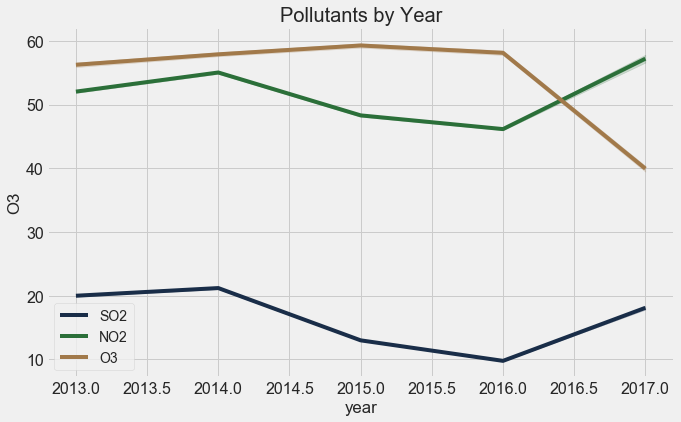

In [105]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=5))
fig = plt.figure(figsize = (10,6))
sns.lineplot(x = 'year', y = 'SO2', data = time, label = 'SO2')
sns.lineplot(x = 'year', y = 'NO2', data = time, label = 'NO2')
sns.lineplot(x = 'year', y = 'O3', data = time, label = 'O3')

plt.title("Pollutants by Year", fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend()

plt.show()

### Sulfur Dioxide (SO2)
A compound produced by burning sulfur containing fossil fuels by power plants and heavy machinery. Naturally produced by volcanos.
When it reacts to other gaseous compounds it produces fine particles that can be easily inhaled. 

Sulfur Dioxide can cause respiratory issues, especially for adults and children who experience issues with asthma. High concentrations can also decrease plant growth which can have detrimental effects on the environment. SO2 is also a contributor of acid rain. 

Source (EPA.gov)

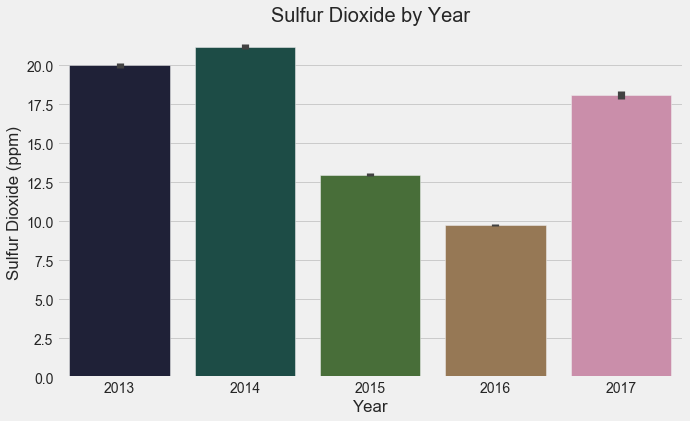

In [110]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'year', y = 'SO2', data = time)
plt.title("Sulfur Dioxide by Year", fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Sulfur Dioxide (ppm)')

fig.savefig('PNG/SO2_Year.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

### Nitrogen Dioxide (NO2)
A gaseous compound produced by cars, trucks, and buses. 

Causes respiratory irritation and asthma if exposed long term. Because it is highly reactive to other things in the air, it causes visible haze and is another contributor of acid rain. This is harmful to ecosystems like lakes, forests. Acid rain affects the health of fish and insects in these ecosystems.  

Source (EPA.gov)

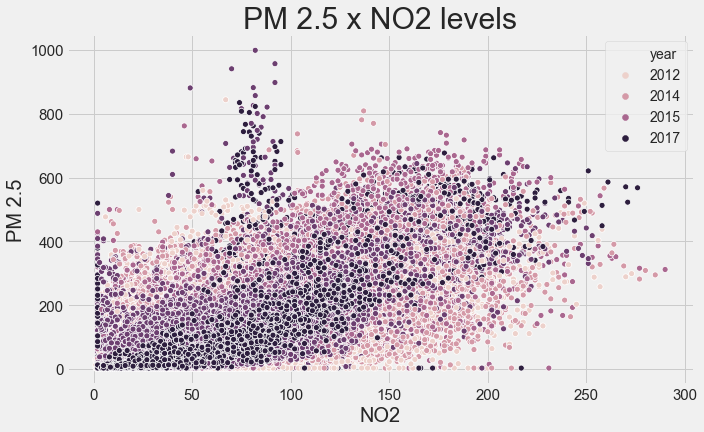

In [117]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (10,6))

sns.scatterplot(x = 'NO2', y = 'PM2.5', hue = 'year', data = time)
plt.title("PM 2.5 x NO2 levels", fontsize = 30)
plt.xlabel("NO2", fontsize = 20)
plt.ylabel("PM 2.5", fontsize = 20)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

fig.savefig('PNG/PM25_NO2.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

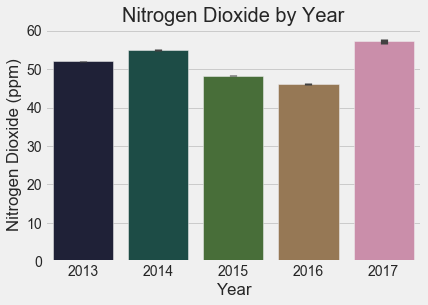

In [112]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
sns.barplot(x = 'year', y = 'NO2', data = time)
plt.title("Nitrogen Dioxide by Year", fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Nitrogen Dioxide (ppm)')

fig.savefig('PNG/NO2_Year.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

### Carbon Monoxide (CO)

Colorless odorless gas that is harmful at high levels. CO is caused by burning fuels by cars, trucks, and power plants. 

You may have heard of Carbon Monoxide poisoning fron indoor sources like kerosene space heaters, gas stoves, or gas leaks.
This gas can cause dizziness, confusion, uncosciousness, or death. 

CO actively reduces the amount of oxygen that can be circulated through the body. While this is not usually highly concentrated outdoors, if as these levels rise outdoors, it can cause major issues for those with heart disease and other heart concerns at it affects the amount of oxygen circulating in the bloodstream. 

Source (EPA.gov)

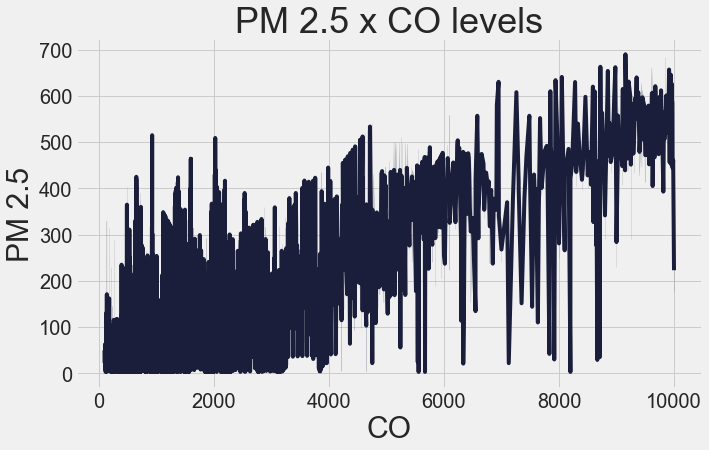

In [114]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (10,6))

sns.lineplot(x = 'CO', y = 'PM2.5', data = time)
plt.title("PM 2.5 x CO levels", fontsize = 36)
plt.xlabel("CO", fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

fig.savefig('PNG/PM25_CO.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

### Ozone (O3)

Caused by burning fossil fuels, it is the main ingredient in smog.

This compound is protective when high in the atmosphere. The ozone layer helps protect our planet, but closer to the ground, it is harmful to the respiratory system and can exacerbate any kind of respiratory illnesses in higher levels, it is also detrimental to agriculture and plant life, especially to more sensitive crops. 

Source (EPA.gov)

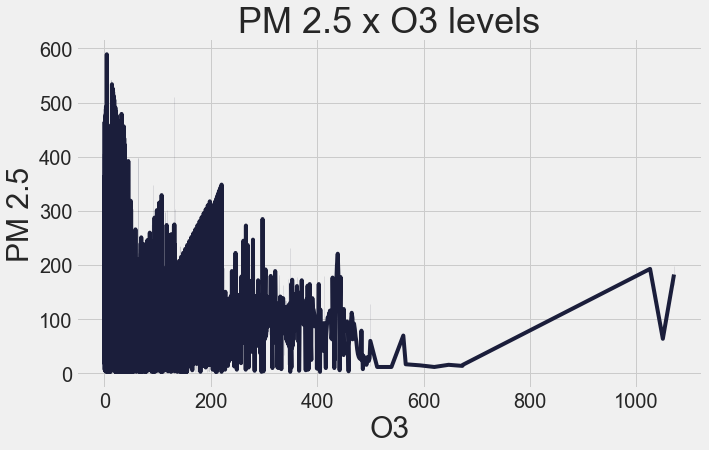

In [115]:
sns.set_palette(sns.color_palette("cubehelix", n_colors=7))
fig = plt.figure(figsize = (10,6))

sns.lineplot(x = 'O3', y = 'PM2.5', data = time)
plt.title("PM 2.5 x O3 levels", fontsize = 36)
plt.xlabel('O3', fontsize = 30)
plt.ylabel("PM 2.5", fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

fig.savefig('PNG/PM25_O3.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

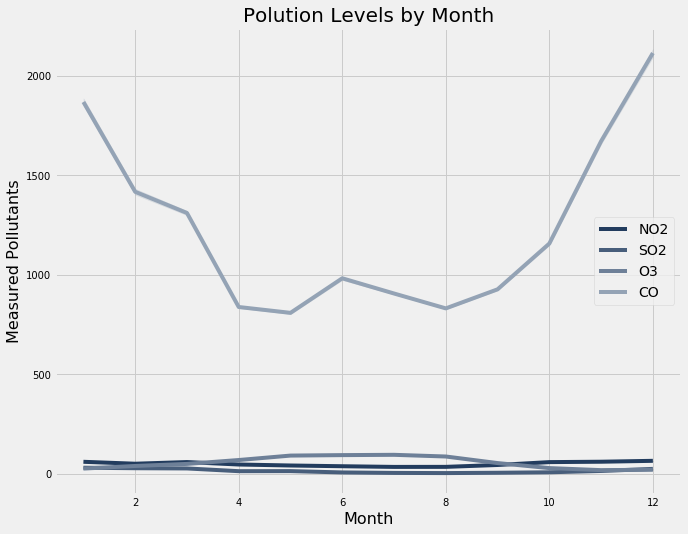

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

#pm25 = sns.lineplot(x = 'month', y = 'PM2.5', data = time, label = 'PM 2.5')
no2 = sns.lineplot(x = 'month', y = 'NO2', data = time, label = 'NO2' )
so2 = sns.lineplot(x = 'month', y = 'SO2', data = time, label = 'SO2')
o3 = sns.lineplot(x = 'month', y = 'O3', data = time, label = 'O3')
co = sns.lineplot(x = 'month', y = 'CO', data = time, label = 'CO');

plt.title('Polution Levels by Month', size = 20)

plt.xlabel('Month', size = 16)
plt.ylabel('Measured Pollutants', size = 16)

plt.xticks(size = 10)
plt.yticks(size = 10)
ax.legend()

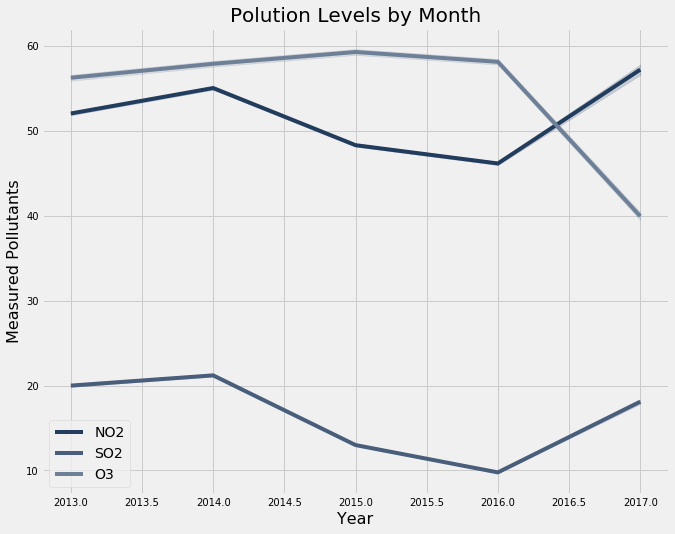

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))

#pm25 = sns.lineplot(x = 'month', y = 'PM2.5', data = time, label = 'PM 2.5')
no2 = sns.lineplot(x = 'year', y = 'NO2', data = time, label = 'NO2' )
so2 = sns.lineplot(x = 'year', y = 'SO2', data = time, label = 'SO2')
o3 = sns.lineplot(x = 'year', y = 'O3', data = time, label = 'O3')
#co = sns.lineplot(x = 'month', y = 'CO', data = time, label = 'CO');

plt.title('Polution Levels by Month', size = 20)

plt.xlabel('Year', size = 16)
plt.ylabel('Measured Pollutants', size = 16)

plt.xticks(size = 10)
plt.yticks(size = 10)
ax.legend()

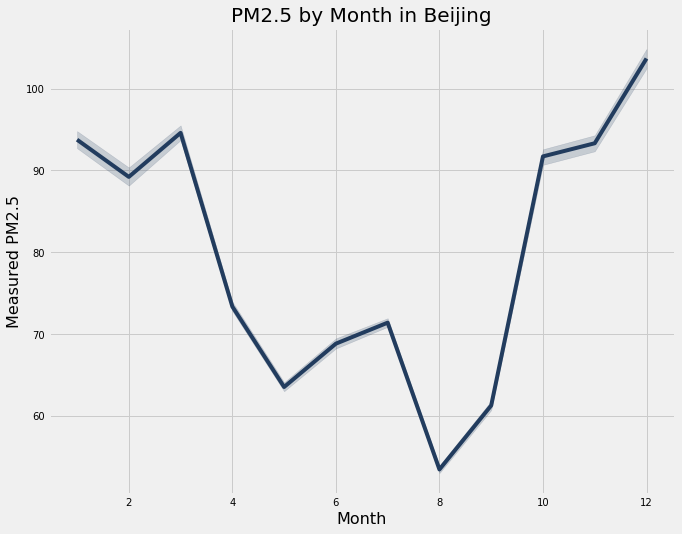

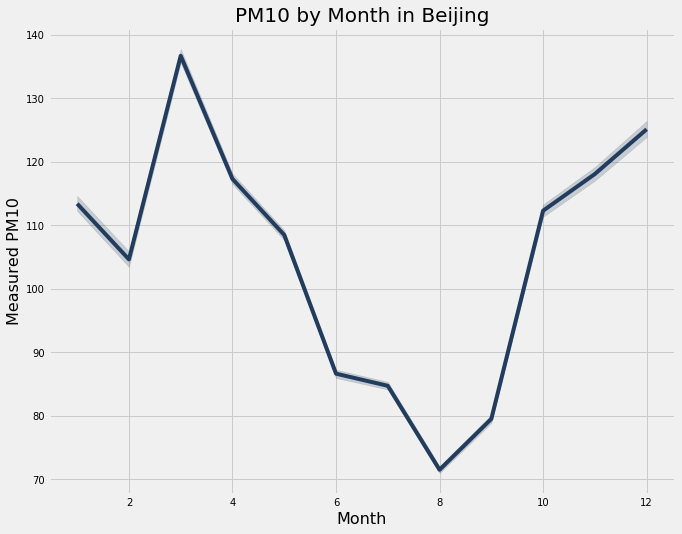

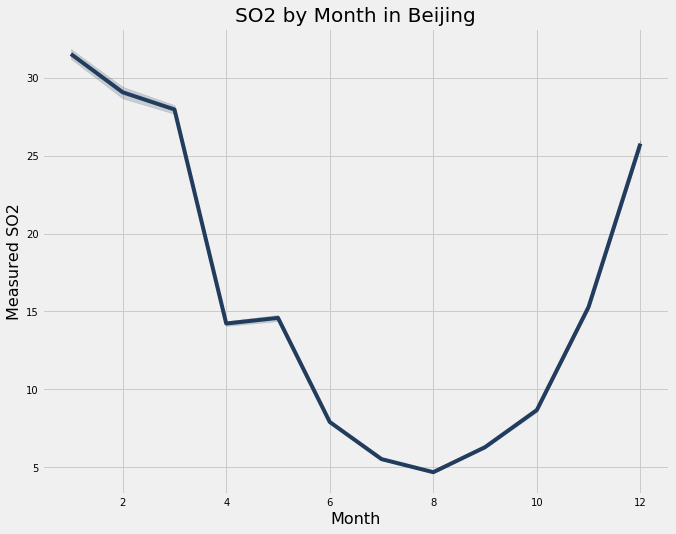

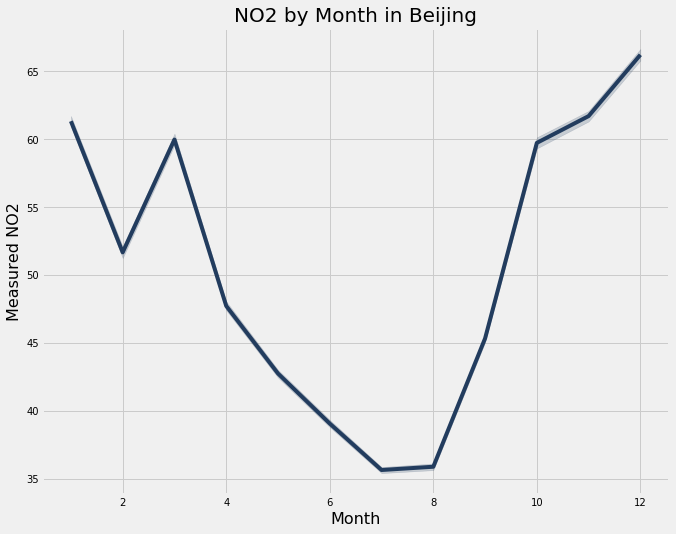

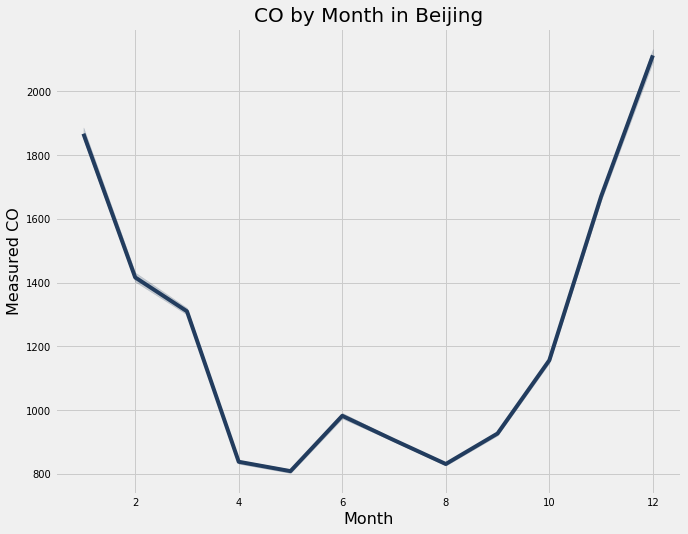

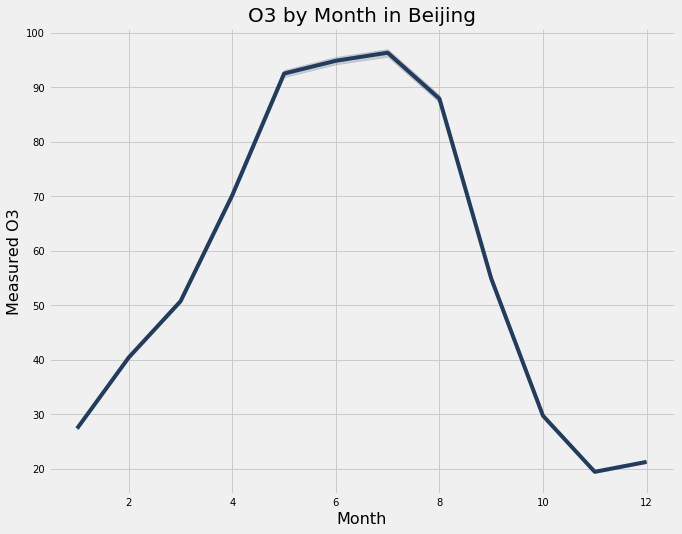

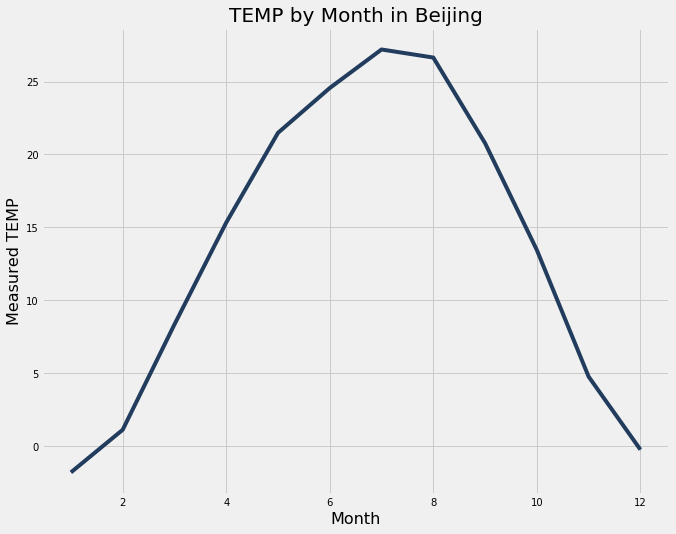

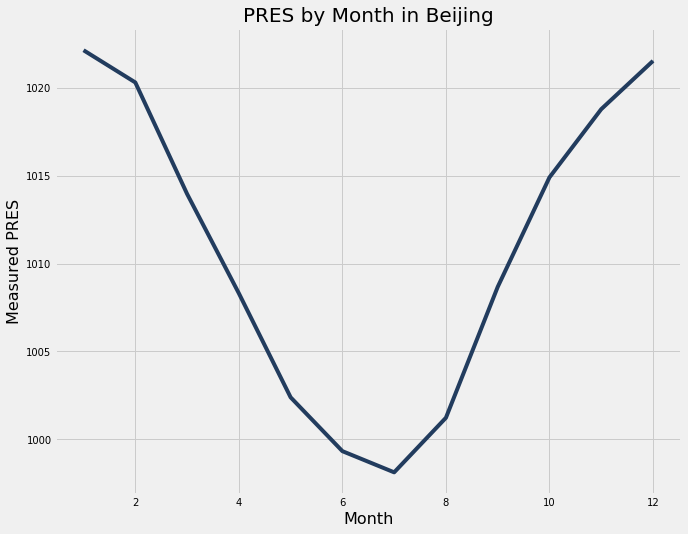

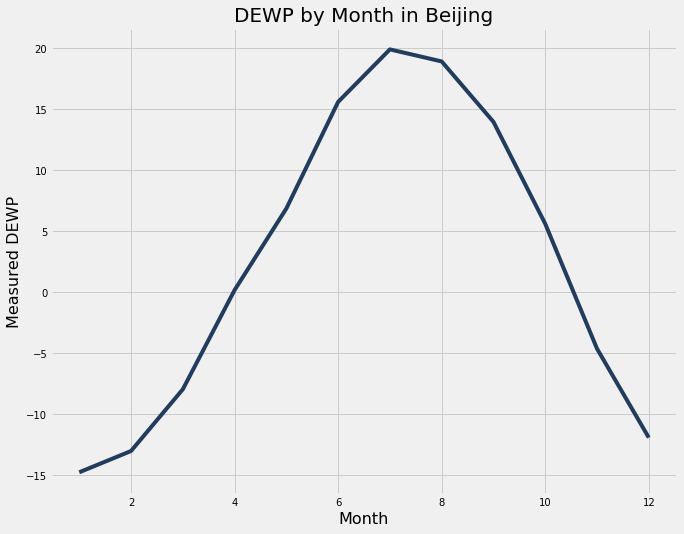

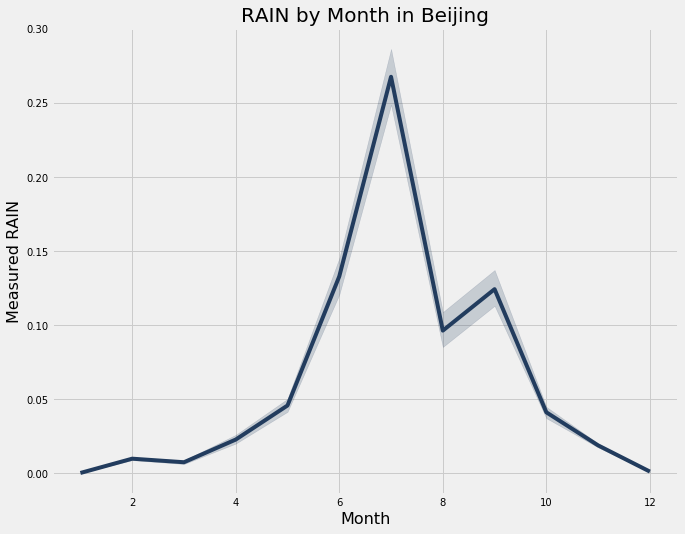

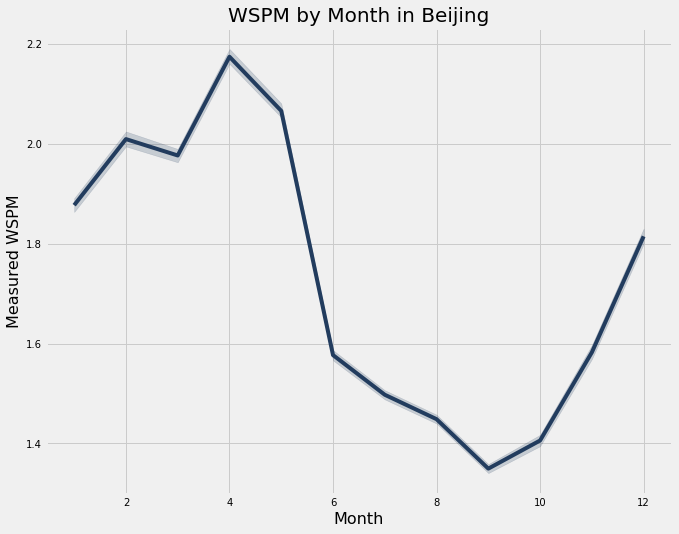

In [10]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP','RAIN','WSPM']
for f in features:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'month', y = f, data = time);
    plt.title(f + ' by Month in Beijing', size = 20)
    plt.xlabel('Month', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);

In [ ]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP','RAIN','WSPM']
for f in features:
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.lineplot(x = 'year', y = f, data = time);
    plt.title(f + ' by Month in Beijing', size = 20)
    plt.xlabel('Month', size = 16)
    plt.ylabel('Measured ' + f, size = 16)
    plt.xticks(size = 10)
    plt.yticks(size = 10);

In [15]:
# Adfuller library 
from statsmodels.tsa.stattools import adfuller
import pandas as pd


# Check adfuller test
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    
# Check mean_std
def check_mean_std(ts):
    # Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
check_adfuller(time['PM2.5'])

In [ ]:
check_mean_std(time['PM2.5'])

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
acf = plot_acf(time, alpha=.05)
pacf = plot_pacf(time, alpha=.05)